# ML Terapan - Salma Oktarina
# Polycystic Ovary Syndrome PCOS
Sumber: https://www.kaggle.com/datasets/lucass0s0/polycystic-ovary-syndrome-pcos

## Import Libraries

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
import zipfile

# Loading Data

In [2]:
# Mout google drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/proyek_ml1/'

Mounted at /content/drive


In [3]:
# Load dataset
try:
    df = pd.read_csv(path + "pcos_rotterdam_balanceado.csv")
    print("Dataset sukses dimuat")
except FileNotFoundError:
    print("Error: 'pcos_rotterdam_balanceado.csv'. Dataset tidak ditemukan.")

Dataset sukses dimuat


# Data Understanding

In [4]:
# Melihat 5 baris pertama data
print("Data 5 Baris Pertama")
df.head()

Data 5 Baris Pertama


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,29,21.2,0,46.1,9,0
1,20,20.5,0,59.4,6,0
2,23,23.1,0,69.3,10,0
3,19,32.7,1,77.7,37,1
4,19,25.9,0,49.4,5,0


In [5]:
# Informasi dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB
None


- Dataset berjumlah 3000 entri data.
- Terdapat 5 kolom fitur tanpa nilai yang hilang, ini menunjukkan data bersih dan siap digunakan untuk analisis lebih lanjut.
- Termasuk data kuantitatif, karena kolom bertipe numerik (int64 dan float64).
- Mencakup faktor medis seperti umur, indeks massa tubuh, ketidakteraturan siklus menstruasi, kadar hormon testosteron (ng/dL), dan jumlah folikel antral berdasarkan USG, yang digunakan untuk memprediksi label target PCOS_Diagnosis (indikasi PCOS).


In [6]:
# Deskirpsi statistik
print("Deskripsi Statistik:")
df.describe()

Deskripsi Statistik:


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,30.052667,23.646000,0.289333,57.228267,10.732333,0.200000
std,7.549982,4.510006,0.453529,18.171066,8.471478,0.400067
min,18.000000,8.500000,0.000000,20.500000,3.000000,0.000000
25%,24.000000,20.800000,0.000000,45.200000,5.000000,0.000000
50%,30.000000,23.400000,0.000000,53.200000,8.000000,0.000000
75%,36.000000,26.300000,1.000000,64.100000,11.000000,0.000000
max,44.000000,44.700000,1.000000,136.400000,39.000000,1.000000


- Rata-rata usia pasien berkisar 30 tahun dan nilai maksimumnya 44 tahun.
- Indek massa tubuh normalnya berkisar 18,5 hingga 24,9. Dilihat dari data nilai terkecilnya 8,5 artinya termasuk kurus dan nilai terbesarnya 44,7 termasuk kategori obesitas.
- Kadar normal tertosteron berkisar 15—70 nanogram per desiliter darah. Bisa dilihat pada dataset kadar terkecil yaitu 20,5 dan kadar terbesar 136,4.
- Jumlah antral folikel normalnya seitar 9 hingga 19 buah. Dan pada dataset terkecil 3 dan terbesar 39.
- Untuk Mestrual Irregularity dan PCOS Diagnosis nilai 0 berarti tidak lancar dan tidak terindikasi, nilai 1 berarti lancar dan terindikasi.

In [7]:
# Analisis missing value
print("Analisis Missing Value:")
print(df.isna().sum())

Analisis Missing Value:
Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64


- Tidak ada missing value, yang artinya data siap digunakan untuk analisis lebih lanjut.

In [8]:
# Analisis duplikasi data
print("Analisis Duplikasi Data:")
print(df.duplicated().sum())

Analisis Duplikasi Data:
0


- Terlihat tidak ada duplikasi data artinya data bersih sekali.

Distribusi Fitur


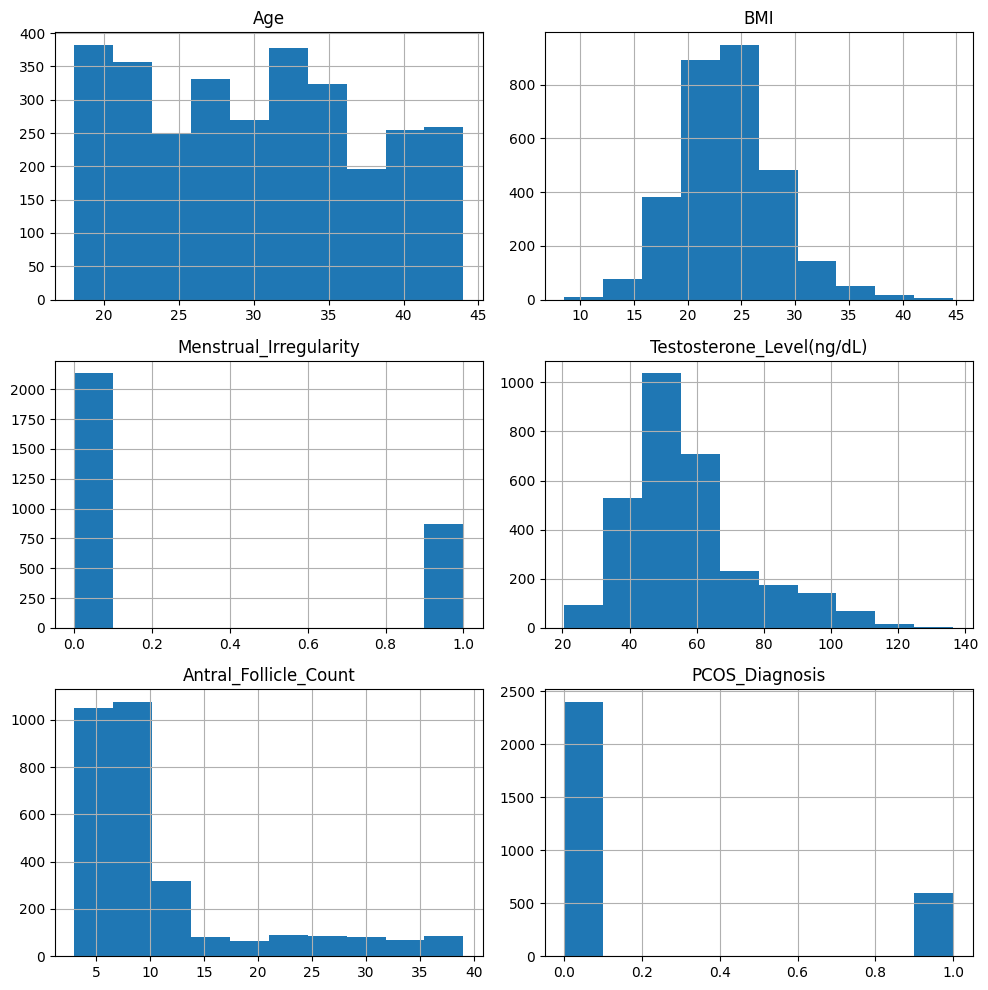

In [9]:
# Visualisaasi distribusi fitur
print("Distribusi Fitur")
df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

- Dilihat pada visualisasi fitur di atas, distribusi data bagus, nilainya juga masuk akal.

Box Plot Fitur


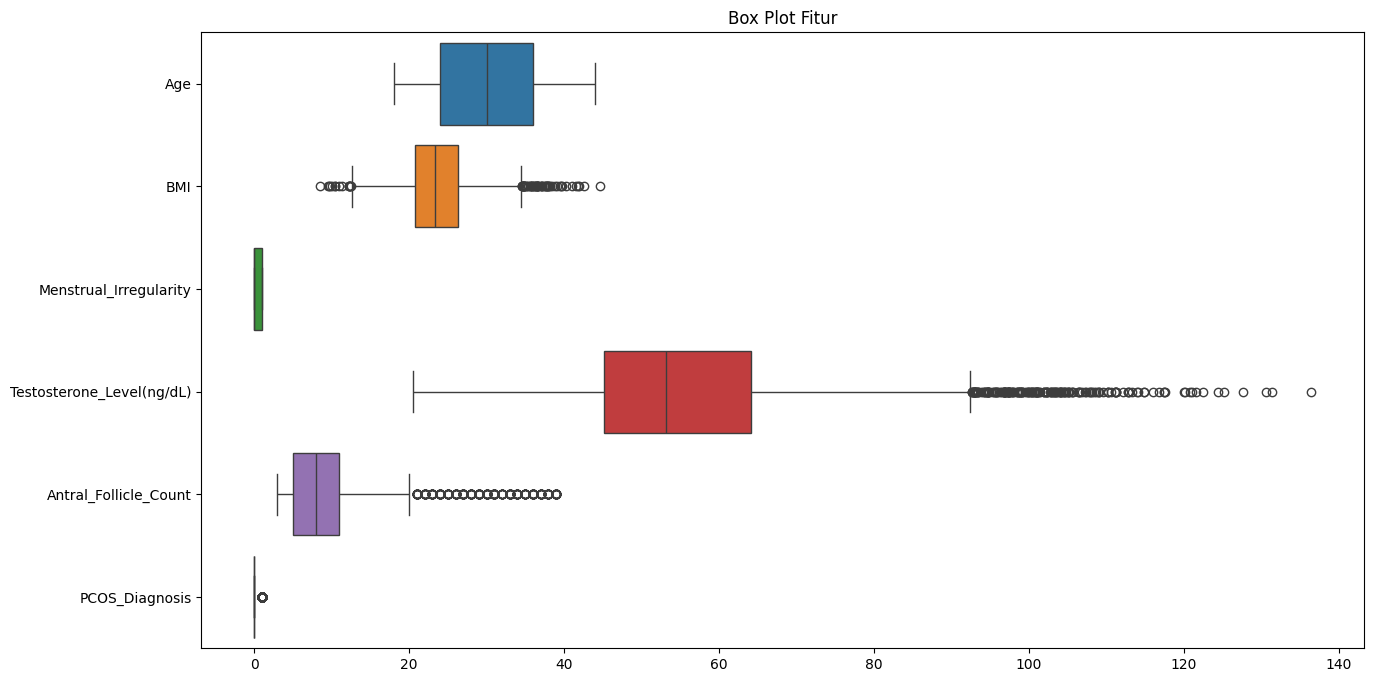

In [10]:
# Visualisasi box plot untuk melihat outliers
print("Box Plot Fitur")
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot Fitur")
plt.show()

- Terlihat kadar testosteron terdapat nilai yang rentangnya lumayan jauh juga.

PCOS Distribusi:
PCOS_Diagnosis
0    2400
1     600
Name: count, dtype: int64


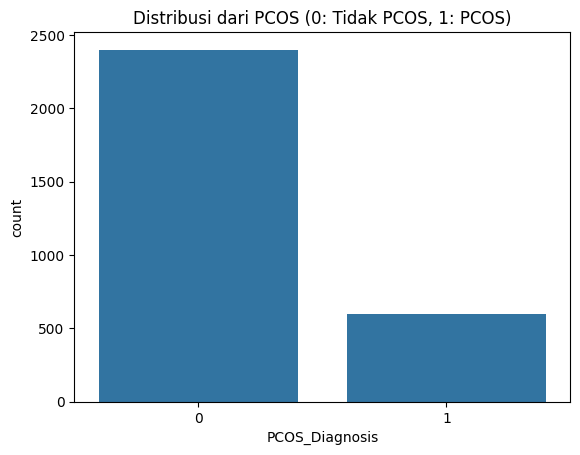

In [11]:
# Visualisasi Distribusi Target ('PCOS_Diagnosis')
print("PCOS Distribusi:")
pcos_counts = df['PCOS_Diagnosis'].value_counts()
print(pcos_counts)
sns.countplot(x='PCOS_Diagnosis', data=df)
plt.title('Distribusi dari PCOS (0: Tidak PCOS, 1: PCOS)')
plt.show()

- Ketimpangan jumlah distribusi data, dimana jumlah tidak terindikasi (nilai 0) lebih banyak dari jumlah yang terindikasi. Ditakutkan model memiliki kecenderungan pada kelas mayoritas.

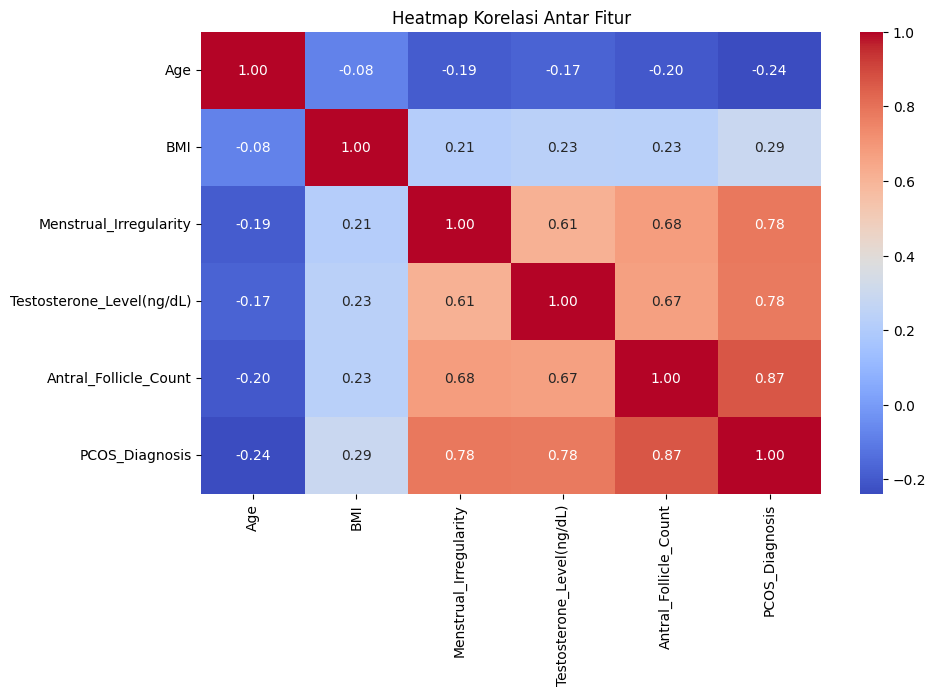

In [12]:
# HEatmap korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

- Berdasarkan matriks korelasi, terlihat fitur yang paling berkorelasi positif terhadap kemungkina terindikasi PCOS (PCOS_Diagnosis) adalah jumlah folikel antral (0.87), kadar testosteron dan ketidakteraturan mestruasi (0.78), dan indeks massa tubuh (0.29).
- Hal ini menunjukkan bahwa jumlah folikel antral, kadar testosteron, dan ketidakteraturan mestruasi berkaitan erat dengan adanya indikasi PCOS.

# Data Preparation

Menangani Outliers dengan Metode IQR
Tidak outlier ditemukan pada 'Age'.
Outliers di 'BMI': 15 lower, 58 upper.
Tidak outlier ditemukan pada 'Menstrual_Irregularity'.
Outliers di 'Testosterone_Level(ng/dL)': 0 lower, 190 upper.
Outliers di 'Antral_Follicle_Count': 0 lower, 411 upper.
Plotting boxplots setelah outlier


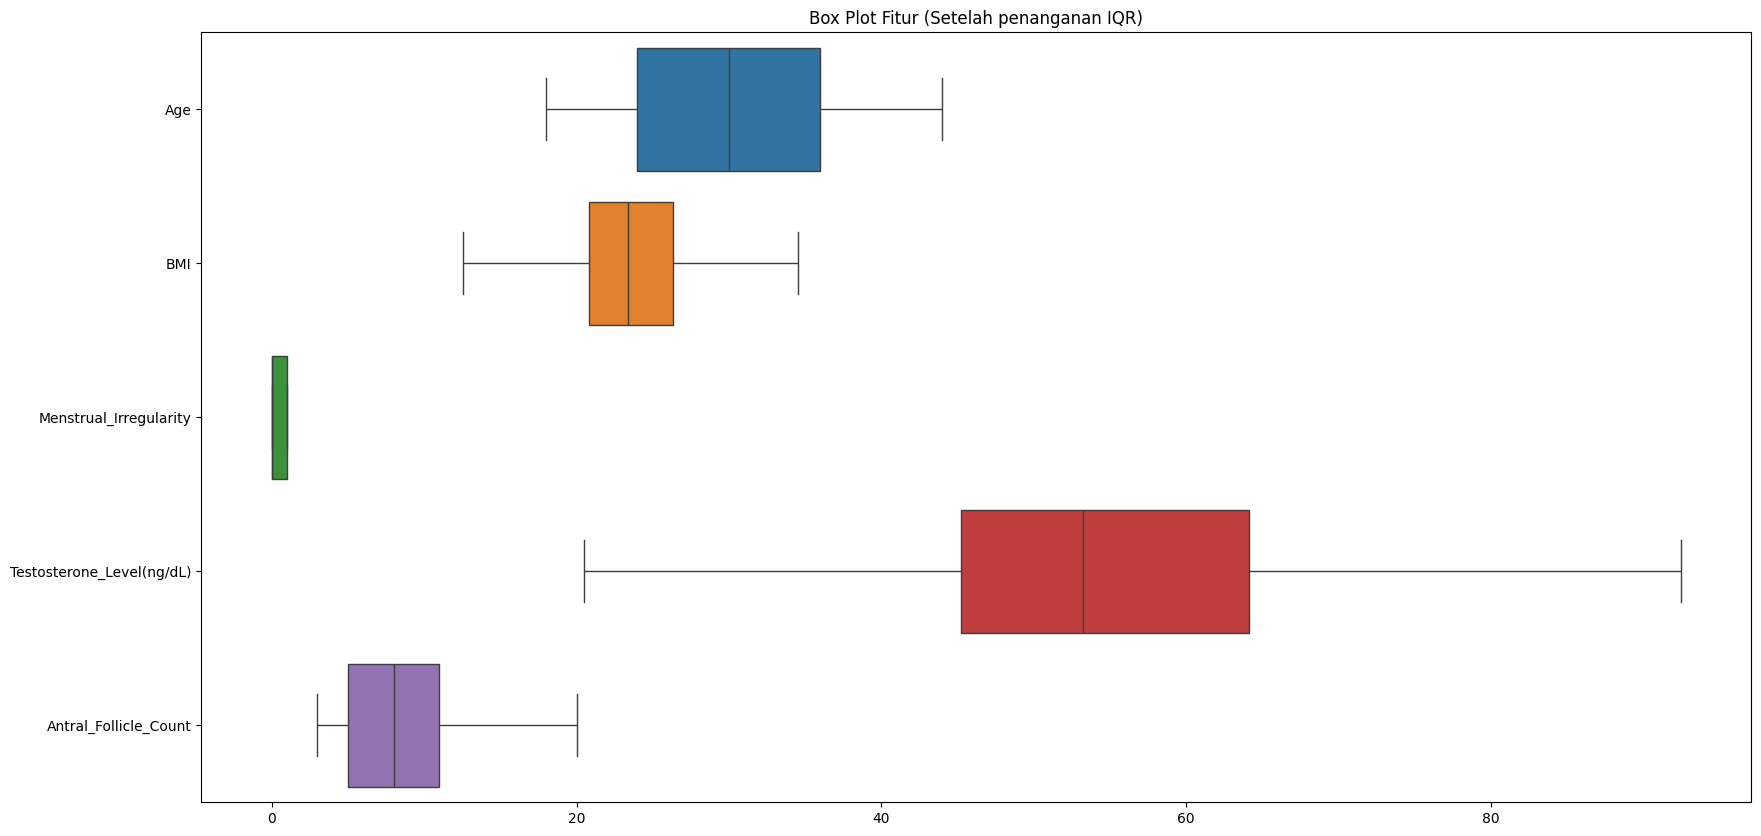

In [13]:
# Penanganan outliers
print("Menangani Outliers dengan Metode IQR")

features = df.drop('PCOS_Diagnosis', axis=1).columns

for column in features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hapus outlier
    initial_lower = df[df[column] < lower_bound].shape[0]
    initial_upper = df[df[column] > upper_bound].shape[0]

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    capped_lower = df[df[column] < lower_bound].shape[0] # Should be 0
    capped_upper = df[df[column] > upper_bound].shape[0] # Should be 0

    if initial_lower > 0 or initial_upper > 0:
        print(f"Outliers di '{column}': {initial_lower} lower, {initial_upper} upper.")
    else:
        print(f"Tidak outlier ditemukan pada '{column}'.")


print("Plotting boxplots setelah outlier")
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop('PCOS_Diagnosis', axis=1), orient='h')
plt.title("Box Plot Fitur (Setelah penanganan IQR)")
plt.show()

- Outliers teratasi, distribusi datanya sudah merata.

# Split Data

In [14]:
# Pisahkan fitur dan target
X = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
y = df['PCOS_Diagnosis']
print("\nFeatures (X) and Target (y) separated.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Features (X) and Target (y) separated.
Shape of X: (3000, 5)
Shape of y: (3000,)


In [15]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nScaling data (5 baris pertama):")
print(X_scaled[:5])


Scaling data (5 baris pertama):
[[-0.13944963 -0.55439086 -0.63806697 -0.63534135 -0.0749124 ]
 [-1.33170419 -0.71594796 -0.63806697  0.17229339 -0.64052617]
 [-0.934286   -0.11587875 -0.63806697  0.77346511  0.11362552]
 [-1.46417692  2.09976141  1.56723361  1.28355021  1.99900476]
 [-1.46417692  0.53034963 -0.63806697 -0.43495078 -0.8290641 ]]


- Setelah di normalisasi, rentang data ada pada 0 sampai 1, artinya normalisasi berhasil dilakukan

In [16]:
# Split data (training 80% dan testing 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train set Outcome distribution:\n", y_train.value_counts(normalize=True))
print("Test set Outcome distribution:\n", y_test.value_counts(normalize=True))

print("\nData split menjadi training dan testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Train set Outcome distribution:
 PCOS_Diagnosis
0    0.807917
1    0.192083
Name: proportion, dtype: float64
Test set Outcome distribution:
 PCOS_Diagnosis
0    0.768333
1    0.231667
Name: proportion, dtype: float64

Data split menjadi training dan testing sets.
X_train shape: (2400, 5)
X_test shape: (600, 5)
y_train shape: (2400,)
y_test shape: (600,)


- Pemisahan dataset baik itu pelatihan dan pengujian yang optimal yaitu 2400 sampel untuk training dan 600 sampel untuk testing.

In [17]:
# Penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Modeling

In [18]:
print("Modeling")

# Model 1: Logistic Regression
print("\nTraining Logistic Regression Classifier...")
lr = LogisticRegression(random_state=42, solver='liblinear') # liblinear bagus untuk dataset kecil
lr.fit(X_train_resampled, y_train_resampled)

# Model 2: Random Forest
print("\nTraining Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

Modeling

Training Logistic Regression Classifier...

Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [19]:
# Hyperparameter Tuning untuk model terpilih ( Random Forest)
print("\nHyperparameter Tuning Untuk Random Forest Menggunakan GridSearchCV")

# Tentukan parameter grid yang lebih kecil untuk contoh cepat
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Gunakan cross-validation 3-fold saja untuk contoh
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=param_grid_rf,
                       cv=3,
                       n_jobs=-1,
                       verbose=1,
                       scoring='accuracy')

rf_grid.fit(X_train_resampled, y_train_resampled)

print("\nParameter Terbaik dari Random Forest:")
print(rf_grid.best_params_)

# Model terbaik dari GridSearchCV
best_rf = rf_grid.best_estimator_
print("\nModel Pelatihan Terbaik Random Forest dengan Parameter Optimal.")



Hyperparameter Tuning Untuk Random Forest Menggunakan GridSearchCV
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Parameter Terbaik dari Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Model Pelatihan Terbaik Random Forest dengan Parameter Optimal.


# Evaluation

In [20]:
# Evaluasi metrik
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0) # Menangani kasus dengan tidak ada prediksi positif
    recall = recall_score(y_true, y_pred, zero_division=0)       # Menangani kasus dengan tidak ada positif sebenarnya
    f1 = f1_score(y_true, y_pred, zero_division=0)               # Menangani kasus dengan tidak ada positif
    mse = mean_squared_error(y_true, y_pred) # MSE untuk klasifikasi (0/1 labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}") # tambah MSE

    print(f"\nConfusion Matrix ({model_name}):")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' if 'Logistic Regression' in model_name else ('Greens' if 'Base RF' in model_name else ('Oranges' if 'Tuned RF' in model_name else 'Purples')))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_true, y_pred, zero_division=0))
    return accuracy, precision, recall, f1, mse


--- Logistic Regression Evaluation ---
Accuracy: 0.9983
Precision: 1.0000
Recall: 0.9928
F1 Score: 0.9964
Mean Squared Error (MSE): 0.0017

Confusion Matrix (Logistic Regression):


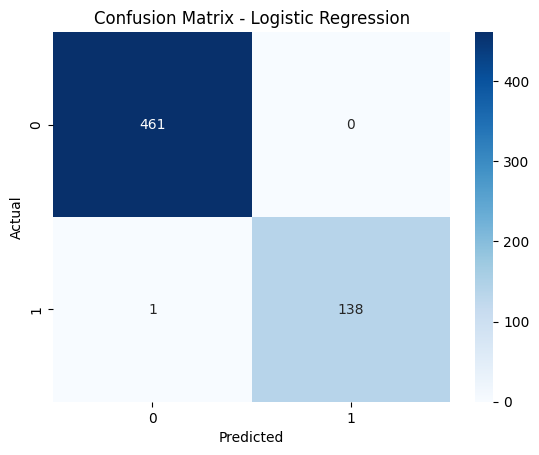


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      0.99      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [21]:
# Evaluasi Model Logistic Regression
y_pred_lr = lr.predict(X_test)
acc_lr, pre_lr, rec_lr, f1_lr, mse_lr = evaluate_model(y_test, y_pred_lr, "Logistic Regression")


--- Random Forest (Baseline) Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error (MSE): 0.0000

Confusion Matrix (Random Forest (Baseline)):


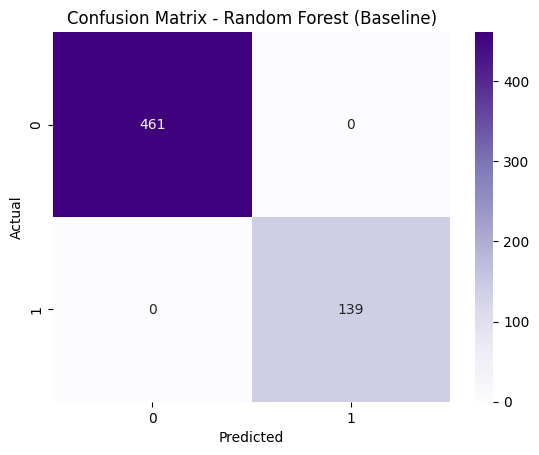


Classification Report (Random Forest (Baseline)):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [22]:
# Evaluasi Model Random Forest (Baseline)
y_pred_rf_base = rf.predict(X_test)
acc_rf_base, pre_rf_base, rec_rf_base, f1_rf_base, mse_rf_base = evaluate_model(y_test, y_pred_rf_base, "Random Forest (Baseline)")


--- Random Forest (Tuned) Evaluation ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Mean Squared Error (MSE): 0.0000

Confusion Matrix (Random Forest (Tuned)):


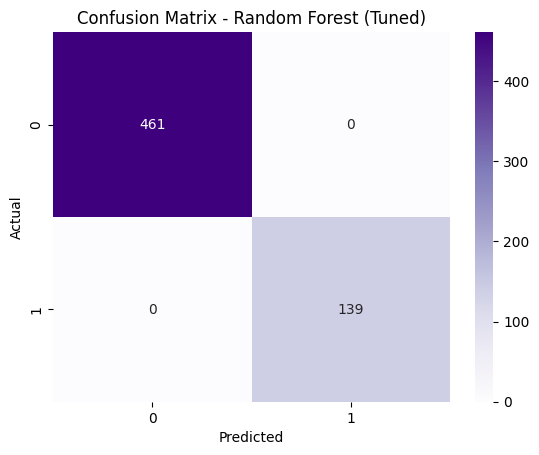


Classification Report (Random Forest (Tuned)):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       461
           1       1.00      1.00      1.00       139

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [23]:
# Evaluasi Model Random Forest (Tuned)
y_pred_rf_tuned = best_rf.predict(X_test)
acc_rf_tuned, pre_rf_tuned, rec_rf_tuned, f1_rf_tuned, mse_rf_tuned = evaluate_model(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")

# Kesimpulan Evaluasi

In [24]:
print("\n=== Evaluation Summary ===")

results_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Baseline)', 'Random Forest (Tuned)'],
    'Accuracy': [acc_lr, acc_rf_base, acc_rf_tuned],
    'Precision': [pre_lr, pre_rf_base, pre_rf_tuned],
    'Recall': [rec_lr, rec_rf_base, rec_rf_tuned],
    'F1 Score': [f1_lr, f1_rf_base, f1_rf_tuned],
    'MSE': [mse_lr, mse_rf_base, mse_rf_tuned]
})

print("\nMetrik Performa Model:")
print(results_summary.round(4)) # dibulatkan 4 angka desimal

print("\nMembandingkan model berdasarkan F1-Score :")
best_f1_model = results_summary.loc[results_summary['F1 Score'].idxmax()]
print(f"Performa model terbaik berdasarkan F1-Score:\n{best_f1_model['Model']} with F1-Score: {best_f1_model['F1 Score']:.4f}")

print("\nMembandingkan model berdasarkan Recall:")
best_recall_model = results_summary.loc[results_summary['Recall'].idxmax()]
print(f"Performal model terbaik berdasarkan Recall:\n{best_recall_model['Model']} with Recall: {best_recall_model['Recall']:.4f}")

print("\nMembandingkan model berdasarkan MSE:")
best_mse_model = results_summary.loc[results_summary['MSE'].idxmin()] # Lower MSE is better
print(f"Model dengan MSE terkecil:\n{best_mse_model['Model']} with MSE: {best_mse_model['MSE']:.4f}")


print("\nProyek Selesai.")


=== Evaluation Summary ===

Metrik Performa Model:
                      Model  Accuracy  Precision  Recall  F1 Score     MSE
0       Logistic Regression    0.9983        1.0  0.9928    0.9964  0.0017
1  Random Forest (Baseline)    1.0000        1.0  1.0000    1.0000  0.0000
2     Random Forest (Tuned)    1.0000        1.0  1.0000    1.0000  0.0000

Membandingkan model berdasarkan F1-Score :
Performa model terbaik berdasarkan F1-Score:
Random Forest (Baseline) with F1-Score: 1.0000

Membandingkan model berdasarkan Recall:
Performal model terbaik berdasarkan Recall:
Random Forest (Baseline) with Recall: 1.0000

Membandingkan model berdasarkan MSE:
Model dengan MSE terkecil:
Random Forest (Baseline) with MSE: 0.0000

Proyek Selesai.


- Hasil evaluasi mode di atas, terlihat kemungkinan model overfitting karena hasilnya sempurna (1.00) artinya model hanya menghafal data dan tidak dapat mengenali pola dengan baik.